In [1]:
import os
import random
import shutil
import glob as gb
from tqdm import tqdm
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, AveragePooling2D,Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

from keras import Model
from keras.layers import Input

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
def visualize_random_images(male_folder, female_folder, num_images=5):
    male_images = os.listdir(male_folder)
    female_images = os.listdir(female_folder)

    fig, axes = plt.subplots(2, num_images, figsize=(15, 7))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for i in range(num_images):
        male_image_path = os.path.join(male_folder, random.choice(male_images))
        female_image_path = os.path.join(female_folder, random.choice(female_images))

        male_img = plt.imread(male_image_path)
        female_img = plt.imread(female_image_path)

        axes[0, i].imshow(male_img)
        axes[0, i].axis('off')
        axes[0, i].set_title('Male')

        axes[1, i].imshow(female_img)
        axes[1, i].axis('off')
        axes[1, i].set_title('Female')

    plt.show()

In [3]:
! kaggle datasets download -d hossamrizk/cctv-gender-classifier-dataset -p /kaggle/input


In [ ]:
import zipfile
import os

# Define the paths
dataset_path = '/kaggle/input/cctv-gender-classifier-dataset.zip'
unzip_dir = '/kaggle/input/cctv-gender-classifier-dataset/'

# Check if the dataset is a zip file and unzip it
if os.path.exists(dataset_path):
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)
    print("Dataset unzipped successfully.")
else:
    print("Dataset zip file not found.")


Dataset unzipped successfully.


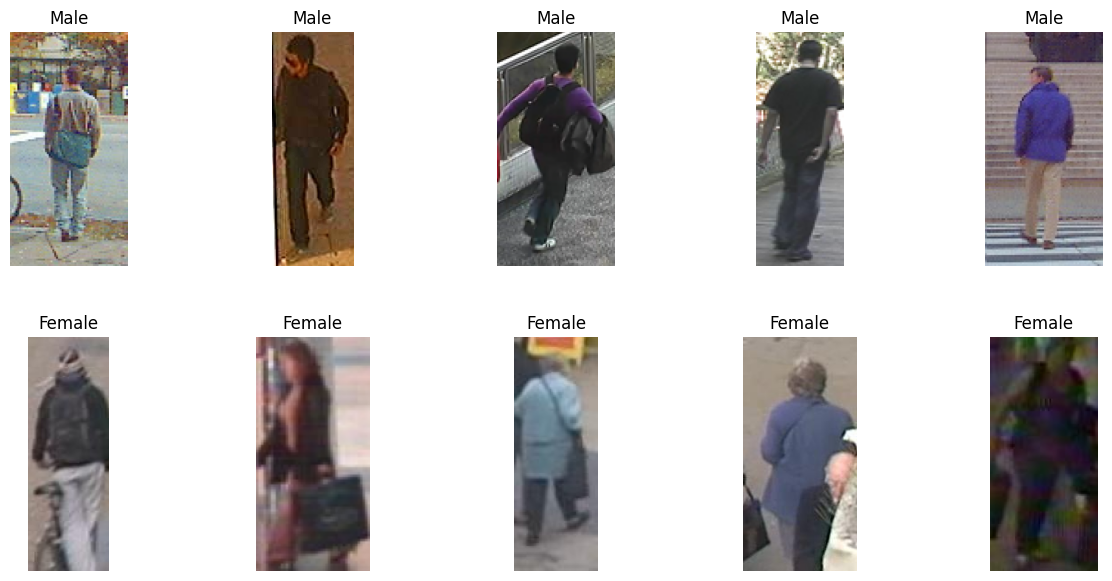

In [ ]:
male_folder = '/kaggle/input/cctv-gender-classifier-dataset/CCTV Gender Classifier Dataset/MALE'
female_folder = '/kaggle/input/cctv-gender-classifier-dataset/CCTV Gender Classifier Dataset/FEMALE'

visualize_random_images(male_folder, female_folder)

In [ ]:
num_male_images = len(os.listdir(male_folder))
num_female_images = len(os.listdir(female_folder))

print(f"Total number of male images: {num_male_images}")
print(f"Total number of female images: {num_female_images}")

Total number of male images: 9447
Total number of female images: 9676


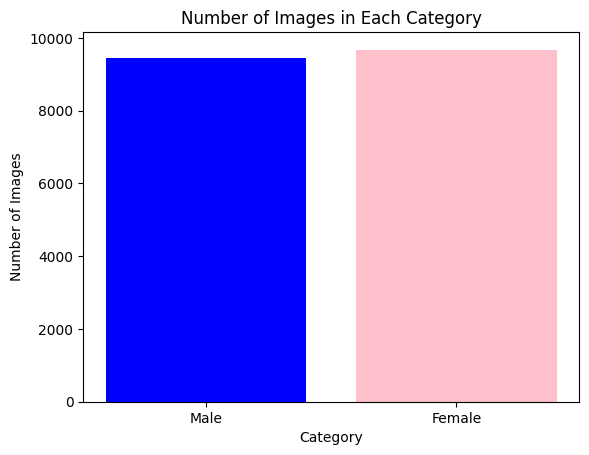

In [ ]:
# Create bar plot
categories = ['Male', 'Female']
num_images = [num_male_images, num_female_images]

plt.bar(categories, num_images, color=['blue', 'pink'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.show()

In [ ]:
DataPath = '/kaggle/input/cctv-gender-classifier-dataset/CCTV Gender Classifier Dataset'

labels2int={"MALE":0,"FEMALE":1}
int2labels={0:"MALE",1:"FEMALE"}

Data = []
Classes = []

# Iterate through each folder in DataPath
for folder in os.listdir(DataPath):
    print(folder)

    # Construct the full path to the folder
    folder_path = os.path.join(DataPath, folder)

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    print(f"Data found {len(files)} in {folder}")

    # Iterate through each file in the folder
    for file in files:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, file)

        # Load the image, resize it, and convert it to an array
        img = load_img(file_path, target_size=(200, 100))
        img_array = img_to_array(img)

        # Preprocess the image array
        img_array = preprocess_input(img_array)

        # Append the preprocessed image array to the Data list
        Data.append(img_array)

        # Append the label to the Classes list based on the folder name
        Classes.append(labels2int[folder])

FEMALE
Data found 9676 in FEMALE
MALE
Data found 9447 in MALE


In [ ]:
lb = LabelBinarizer()
Classes = lb.fit_transform(Classes)
Classes = to_categorical(Classes)

In [ ]:
print("Shape of Classes after binarization and conversion:", Classes.shape)

Shape of Classes after binarization and conversion: (19123, 2)


In [ ]:
Data = np.array(Data,dtype = "float32")
Classes = np.array(Classes)
trainx,testx,trainy,testy = train_test_split(Data,Classes,test_size=0.20,stratify=Classes,
                                             random_state=42,shuffle=True)
print("Shape of training data (trainx):", trainx.shape)
print("Shape of testing data (testx):", testx.shape)
print("Shape of training labels (trainy):", trainy.shape)
print("Shape of testing labels (testy):", testy.shape)

Shape of training data (trainx): (15298, 200, 100, 3)
Shape of testing data (testx): (3825, 200, 100, 3)
Shape of training labels (trainy): (15298, 2)
Shape of testing labels (testy): (3825, 2)


In [ ]:
Data = np.array(Data,dtype = "float32")
Classes = np.array(Classes)
# Split data into training and testing sets (80% train, 20% test)
Data_train, Data_test, Classes_train, Classes_test = train_test_split(Data, Classes, test_size=0.2, random_state=42)

# Split training data into training and validation sets (80% train, 20% validation)
Data_train, Data_val, Classes_train, Classes_val = train_test_split(Data_train, Classes_train, test_size=0.2, random_state=42)

print("Shape of training data (Data_train):", Data_train.shape)
print("Shape of Validation data (Data_val):", Data_val.shape)
print("Shape of testing data (Data_test):", Data_test.shape)
print('=============================================================')
print("Shape of training labels (Classes_train):", Classes_train.shape)
print("Shape of Validation labels (Classes_test):", Classes_val.shape)
print("Shape of testing labels (Classes_test):", Classes_test.shape)

Shape of training data (Data_train): (12238, 200, 100, 3)
Shape of Validation data (Data_val): (3060, 200, 100, 3)
Shape of testing data (Data_test): (3825, 200, 100, 3)
Shape of training labels (Classes_train): (12238, 2)
Shape of Validation labels (Classes_test): (3060, 2)
Shape of testing labels (Classes_test): (3825, 2)


In [ ]:
def resnet50_modelarch():
    lr = 1e-5
    epochs = 10

    basemodel= ResNet50(include_top=False, input_shape=(200,100,3))
    headmodel= basemodel.output
    headmodel= AveragePooling2D(pool_size=(3,3))(headmodel)

    #headmodel = Dense(1024, activation="relu")(headmodel)
    #headmodel = Dropout(0.3)(headmodel)
    headmodel = Flatten(name="flatten")(headmodel)
    headmodel = Dense(512, activation="relu")(headmodel)
    headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(256, activation="relu")(headmodel)
    headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(128, activation="relu")(headmodel)
    headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(64, activation="relu")(headmodel)
    #headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(2, activation='softmax')(headmodel)

    model=Model(inputs=basemodel.input, outputs=headmodel)

    for layer in basemodel.layers:
        layer.trainable=False

    opt=Adam(learning_rate=lr, decay=lr / epochs)
    model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
    callback = EarlyStopping(monitor='val_loss',patience=6)

    return model,callback,epochs

In [ ]:
model,callback,Epochs = resnet50_modelarch()
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


c:\Users\DELL-RL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 206, 106,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 100, 50,   │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 100, 50,   │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 100, 50,   │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 102, 52,   │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 50, 25,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 50, 25,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 50, 25,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 50, 25,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 50, 25,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 50, 25,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 50, 25,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 50, 25,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 50, 25,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 50, 25,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 50, 25,    │      1,024 │ conv2_block1_3_c

 Total params: 25,857,986 (98.64 MB)

 Trainable params: 2,270,274 (8.66 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history = model.fit(Data_train,Classes_train,
                    batch_size=32,
                    validation_data=(Data_val,Classes_val),
                    epochs=30,callbacks=[callback])

Epoch 1/30
201/383 ━━━━━━━━━━━━━━━━━━━━ 12:40 4s/step - accuracy: 0.5321 - loss: 0.8477

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
predIdxs = model.predict(Data_test,batch_size=32)
predIdxs=np.argmax(predIdxs,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
testy_res = Classes_test.argmax(axis=1)
CR = classification_report(testy_res, predIdxs)
print(CR)

In [ ]:
# Get predictions for the test set
predictions = model.predict(Data_test)

# Convert predictions to class labels (0 for male, 1 for female)
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with true labels
correct_predictions = np.sum(predicted_labels == np.argmax(Classes_test, axis=1))
total_samples = len(Classes_test)

# Calculate accuracy
accuracy = correct_predictions / total_samples
print("Test Accuracy:", accuracy)

In [ ]:
class_names=['MALE','FEMALE']

In [ ]:
import random
def plot_prediction(Data_test, Classes_test, n_images, class_names):
    """
    Test the model on random predictions and plot the results.

    Args:
        Data_test (numpy array): The test images data.
        Classes_test (numpy array): The true labels for the test images.
        n_images (int): Number of images to plot.
        class_names (list): List of class names.
    """
    # Get the total number of test images
    num_images = len(Data_test)

    # Randomly select indices for the images to plot
    random_indices = random.sample(range(num_images), n_images)

    # Make predictions on the selected test data
    predictions = np.argmax(model.predict(Data_test[random_indices]), axis=1)

    # Plot the randomly selected images along with their true labels and predictions
    plt.figure(figsize=(14, 15))
    for i, idx in enumerate(random_indices):
        plt.subplot(4, 3, i+1)
        plt.imshow(Data_test[idx])
        if predictions[i] == np.argmax(Classes_test[idx]):
            title_color = 'g'  # green color for correct predictions
        else:
            title_color = 'r'  # red color for incorrect predictions
        plt.title(class_names[np.argmax(Classes_test[idx])], color=title_color)
        plt.axis('off')

    plt.show()


In [ ]:
plot_prediction(Data_test, Classes_test, n_images=6, class_names=class_names)

In [ ]:
model.save("GenderClassification.h5")